In [ ]:
import pandas as pd

In [ ]:
data_check = pd.read_csv("/content/drive/MyDrive/kyw/codes/check_dataset.csv")

In [ ]:
data_main = pd.read_csv("/content/drive/MyDrive/kyw/codes/main_database.csv")

In [ ]:
data_check.head()

,name,og,count
0,Wedding Cake,True,4
1,GG4,True,4
2,Dosidos,True,4
3,Ice Cream Cake,False,2
4,Runtz,True,1


In [ ]:
data_main.head()

,chemovar,name,akas,rating,content_cent,page_link
0,Hybrid,Wedding Cake,"aka Triangle Mints #23, Pink Cookies",4.6,"['THC 24%', 'CBG 1%']",/strains/wedding-cake
1,Hybrid,GG4,"aka Gorilla Glue, Original Glue, Gorilla Glue ...",4.6,"['THC 20%', 'CBD 0%']",/strains/original-glue
2,Hybrid,Dosidos,"aka Dosi, Do-Si-Dos",4.6,"['THC 20%', 'CBG 1%']",/strains/do-si-dos
3,Indica,Ice Cream Cake,NaN,4.6,"['THC 23%', 'CBG 1%']",/strains/ice-cream-cake
4,Hybrid,Runtz,aka Runtz OG,4.6,"['THC 20%', 'CBD 0%']",/strains/runtz


In [ ]:
data_desc = pd.read_csv("/content/drive/MyDrive/kyw/codes/descriptive_dataset.csv")

In [ ]:
def helper_one(ser):
  ser = ser.strip('][').split(',')[0]
  return ser

In [ ]:
data_desc["params"] = data_desc["params"].apply(lambda x:helper_one(x))

In [ ]:
data_desc["description"][0]

'Wedding Cake, also known as "Triangle Mints #23,"\xa0is a potent type of indica-hybrid marijuana strain made by crossing Triangle Kush with Animal Mints. Fun fact: In Canada, this strain is known as Pink Cookies. The Wedding Cake strain provides relaxing and euphoric effects that calm the body and mind. This strain yields a rich and tangy flavor profile with undertones of earthy pepper. Medical marijuana patients choose Wedding Cake to help relieve symptoms associated with pain, insomnia and appetite loss. Consumers with a low THC tolerance should enjoy this strain with an extra slice of care due to its high THC content. Wedding Cake has soared in popularity over the years and was named Leafly Strain of the Year in 2019.Wedding Cake growing info Wedding Cake is a popular strain choice for both intermediate and advanced growers. This strain can be grown indoors and outdoors. You can expect a flowering time of 7-9 weeks. When grown outside, Wedding Cake will finish between September thr

In [ ]:
data_check_true = data_check[data_check["og"] == True]

In [ ]:
data_check_false = data_check[data_check["og"] == False]

In [ ]:
data_check_true = data_check_true[data_check_true["count"]>0]

In [ ]:
data_check_false = data_check_false[data_check_false["count"]>1]

In [ ]:
data_check_false

,name,og,count
3,Ice Cream Cake,False,2
34,MAC,False,4
40,Chemdawg,False,4
44,Stardawg,False,4
49,Grease Monkey,False,3
...,...,...,...
4441,Do-Over OG,False,2
4446,Gorilla Biscuit,False,3
4457,Waldo,False,3
4516,Afghooey,False,4


In [ ]:
frames = [data_check_true,data_check_false]

In [ ]:
data_final = pd.concat(frames)

In [ ]:
data_final["skip_1"] = (data_final["og"] == False)

In [ ]:
data_final.drop(["og","count"],axis = 1,inplace = True)

In [ ]:
data_final.shape[0]

1960

In [ ]:
data_final["text_embeddings"] = data_desc[data_final["name"] == data_desc["name"]]["uri"]

ValueError: ignored

In [ ]:
image_locs = []
faulty_strains = []
for i in range(data_final.shape[0]):
  curr_row = data_final.iloc[i,:]
  curr_name = curr_row["name"]
  try:
    curr_loc = data_desc[data_desc["name"] == curr_name]["uri"].values[0].split('/')[-1]
    final_loc = "/content/drive/MyDrive/kyw/datasets/images/" + curr_loc
    image_locs.append(final_loc)
  except Exception as e:
    image_locs.append("Nan")

In [ ]:
data_desc.iloc[0,:]["name"]

'Wedding Cake'

,name,skip_1
0,Wedding Cake,False
1,GG4,False
2,Dosidos,False
4,Runtz,False
5,Gelato,False
...,...,...
4441,Do-Over OG,True
4446,Gorilla Biscuit,True
4457,Waldo,True
4516,Afghooey,True


In [ ]:
data_final["image_loc"] = image_locs

In [ ]:
data_final

,name,skip_1,image_loc
0,Wedding Cake,False,wedding-cake
1,GG4,False,original-glue
2,Dosidos,False,do-si-dos
4,Runtz,False,runtz
5,Gelato,False,gelato
...,...,...,...
4513,Sour Heads,True,sour-heads
4514,Golden Grapes,True,golden-grapes
4515,Colorado Diesel,True,colorado-diesel
4516,Afghooey,True,Nan


In [ ]:
data_final.iloc[1,:]["text_embeddings"]

'/content/drive/MyDrive/kyw/text_embeddings/original-glue'

In [ ]:
data_final = data_final[data_final["image_loc"] != "Nan"]

In [ ]:
data_final.to_csv("/content/drive/MyDrive/kyw/codes/final_dataset.csv")

In [ ]:
data_final.shape[0]

1952

In [ ]:
import os

In [ ]:
list_complete = os.listdir("/content/drive/MyDrive/kyw/datasets/images")

In [ ]:
list_complete = [("/content/drive/MyDrive/kyw/datasets/images/" + x) for x in list_complete]

In [ ]:
list_req = data_final["image_loc"].tolist()

In [ ]:
len(list_complete)

4459

In [ ]:
len(list_req)

1952

In [ ]:
list_delete = [x for x in list_complete if x not in list_req]

In [ ]:
len(list_delete)

2507

In [ ]:
list_complete[0]

'/content/drive/MyDrive/kyw/datasets/images/haterade'

In [ ]:
import shutil

In [ ]:
for x in list_delete:
  shutil.rmtree(x)

In [ ]:
for i in range(data_final.shape[0]):
  curr_row = data_final.iloc[i,:]
  check = curr_row["skip_1"]
  if check:
    os.remove(curr_row["image_loc"] + "/1.jpg")

In [ ]:
for x in list_req:
  check = os.path.isdir(x)
  if check == False:
    print(x)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_final = pd.read_csv("/content/drive/MyDrive/kyw/codes/final_dataset.csv")

In [ ]:
data_final.head()

,name,text_embeddings,image_loc,label
0,Wedding Cake,/content/drive/MyDrive/kyw/text_embeddings/wed...,/content/drive/MyDrive/kyw/datasets/images/wed...,10
1,GG4,/content/drive/MyDrive/kyw/text_embeddings/ori...,/content/drive/MyDrive/kyw/datasets/images/ori...,10
2,Dosidos,/content/drive/MyDrive/kyw/text_embeddings/do-...,/content/drive/MyDrive/kyw/datasets/images/do-...,9
3,Runtz,/content/drive/MyDrive/kyw/text_embeddings/runtz,/content/drive/MyDrive/kyw/datasets/images/runtz,14
4,Gelato,/content/drive/MyDrive/kyw/text_embeddings/gelato,/content/drive/MyDrive/kyw/datasets/images/gelato,3


In [ ]:
data_final.drop(["Unnamed: 0","skip_1"],axis = 1,inplace = True)

In [ ]:
data_final.head()

,name,text_embeddings,image_loc
0,Wedding Cake,/content/drive/MyDrive/kyw/text_embeddings/wed...,/content/drive/MyDrive/kyw/datasets/images/wed...
1,GG4,/content/drive/MyDrive/kyw/text_embeddings/ori...,/content/drive/MyDrive/kyw/datasets/images/ori...
2,Dosidos,/content/drive/MyDrive/kyw/text_embeddings/do-...,/content/drive/MyDrive/kyw/datasets/images/do-...
3,Runtz,/content/drive/MyDrive/kyw/text_embeddings/runtz,/content/drive/MyDrive/kyw/datasets/images/runtz
4,Gelato,/content/drive/MyDrive/kyw/text_embeddings/gelato,/content/drive/MyDrive/kyw/datasets/images/gelato


In [ ]:
cvtd_dataset = pd.read_csv("/content/drive/MyDrive/kyw/converted_dataset.csv")

In [ ]:
cvtd_dataset.head()

,description,label
0,"Wedding Cake, also known as ""Triangle Mints #2...",17
1,"Original Glue, also known as ""Gorilla Glue,"" ""...",17
2,"Dosidos strain info Dosidos, also known as ""Do...",2
3,Ice Cream Cake is an indica marijuana strain m...,2
4,"Runtz, also known as ""Runtz OG,"" is a rare typ...",26


In [ ]:
image_locs = []
faulty_strains = []
for i in range(data_final.shape[0]):
  curr_row = data_final.iloc[i,:]
  curr_name = curr_row["name"]
  try:
    curr_loc = data_desc[data_desc["name"] == curr_name]["params"].values[0]
    #final_loc = "/content/drive/MyDrive/kyw/datasets/images/" + curr_loc
    image_locs.append(curr_loc)
  except Exception as e:
    pass

In [ ]:
data_final["label"] = image_locs

In [ ]:
all_classes = list(set(data_desc["params"].tolist()))

In [ ]:
data_final["label"] = data_final["label"].apply(lambda x:all_classes.index(x))

In [ ]:
data_final.head()

,name,text_embeddings,image_loc,label
0,Wedding Cake,/content/drive/MyDrive/kyw/text_embeddings/wed...,/content/drive/MyDrive/kyw/datasets/images/wed...,10
1,GG4,/content/drive/MyDrive/kyw/text_embeddings/ori...,/content/drive/MyDrive/kyw/datasets/images/ori...,10
2,Dosidos,/content/drive/MyDrive/kyw/text_embeddings/do-...,/content/drive/MyDrive/kyw/datasets/images/do-...,9
3,Runtz,/content/drive/MyDrive/kyw/text_embeddings/runtz,/content/drive/MyDrive/kyw/datasets/images/runtz,14
4,Gelato,/content/drive/MyDrive/kyw/text_embeddings/gelato,/content/drive/MyDrive/kyw/datasets/images/gelato,3


In [ ]:
all_classes[12]

"'Relaxed'"

In [ ]:
data_final.to_csv("/content/drive/MyDrive/kyw/codes/final_dataset.csv",index = False)

In [ ]:
set(data_final["label"].tolist())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch
import imageio
import pandas as pd
import os

In [ ]:
class WeedDataset(Dataset):
  def __init__(self,csv_path,transform = None):
    self.df = pd.read_csv(csv_path)
    self.transform = transform
  def __len__(self):
    return (self.df.shape[0])
  def __getitem__(self,idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()
    curr_row = self.df.iloc[idx,:]
    label = curr_row["label"]
    image_dir = curr_row["image_loc"]
    curr_all_images = []
    for i in os.listdir(image_dir):
      curr_img_path = os.path.join(image_dir,i)
      curr_img = imageio.imread(curr_img_path)
      if self.transform is not None:
        curr_img = self.transform(curr_img)
      curr_all_images.append(curr_img)
    return (curr_all_images,label)

In [ ]:
weed_dataset = WeedDataset("/content/drive/MyDrive/kyw/codes/final_dataset.csv")

In [ ]:
curr_check = weed_dataset.__getitem__(0)

In [ ]:
import torchvision
from torchvision import transforms

In [ ]:
transform = transforms.Compose([transforms.Resize((255+, 255)),
                                transforms.ToTensor()])

In [ ]:
data_final["label"] = data_final["label"].apply(lambda x:all_classes[x])

In [ ]:
all_classes_new = list(set(data_final["label"].tolist()))

In [ ]:
data_final["label"] = data_final["label"].apply(lambda x:all_classes_new.index(x))

In [ ]:
data_final.head()

,name,text_embeddings,image_loc,label
0,Wedding Cake,/content/drive/MyDrive/kyw/text_embeddings/wed...,/content/drive/MyDrive/kyw/datasets/images/wed...,10
1,GG4,/content/drive/MyDrive/kyw/text_embeddings/ori...,/content/drive/MyDrive/kyw/datasets/images/ori...,10
2,Dosidos,/content/drive/MyDrive/kyw/text_embeddings/do-...,/content/drive/MyDrive/kyw/datasets/images/do-...,9
3,Runtz,/content/drive/MyDrive/kyw/text_embeddings/runtz,/content/drive/MyDrive/kyw/datasets/images/runtz,14
4,Gelato,/content/drive/MyDrive/kyw/text_embeddings/gelato,/content/drive/MyDrive/kyw/datasets/images/gelato,3


In [ ]:
label_list = list(set(data_final["label"].tolist()))

In [ ]:
label_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
import shutil

In [ ]:
BASE_DIR = "/content/drive/MyDrive/kyw/updated_dataset"
for i in label_list:
  df_curr = data_final[data_final["label"] == i]
  curr_dir = os.path.join(BASE_DIR , str(i))
  os.mkdir(curr_dir)
  for j in range(df_curr.shape[0]):
    curr_row = df_curr.iloc[j,:]
    curr_image_dir = curr_row["image_loc"]
    curr_name = curr_image_dir.split('/')[-1]
    file_list = os.listdir(curr_image_dir)
    print(len(file_list))
    for file_name in file_list:
      src = curr_image_dir  + "/" + file_name
      dst = curr_dir + "/" + curr_name + "_" + file_name
      shutil.move(src,dst)


3
1
1
3
1
2
4
4
4
4
4
2
4
4
4
1
4
4
4
4
4
2
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
2
1
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
2
1
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
1
2
3
3
3
3
3
3
3
3
3
2
3
2
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
1
3
2
3
3
3
3
3
3
2
3
3
3
3
1
3
3
3
3
3
3
1
3
3
2
3
3
3
3
3
3
2
2
3
1
2
3
1
3
3
1
1
3
2
3
3
2
3
1
3
3
3
1
2
2
2
4
4
4
4
1
1
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
1
1
3
3
3
3
2
2
3
3
1
3
2
1
3
1
3
3
1
3
3
3
3
3
3
1
1
1
3
2
2
3
3
2
3
3
3
3
3
2
1
3
3
3
2
3
4
4
4
4
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
1
3
3
3
3
3
2
1
2
3
3
2
3
3
3
1
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
1
3
3
3
3
3
1
3
1
3
3
1
3
3
1
3
3
1
3
3
2
3
3
1
3
3
2
1
2
3
1
1
1
3


In [ ]:
data_final.head()

,name,text_embeddings,image_loc,label
0,Wedding Cake,/content/drive/MyDrive/kyw/text_embeddings/wed...,/content/drive/MyDrive/kyw/datasets/images/wed...,10
1,GG4,/content/drive/MyDrive/kyw/text_embeddings/ori...,/content/drive/MyDrive/kyw/datasets/images/ori...,10
2,Dosidos,/content/drive/MyDrive/kyw/text_embeddings/do-...,/content/drive/MyDrive/kyw/datasets/images/do-...,9
3,Runtz,/content/drive/MyDrive/kyw/text_embeddings/runtz,/content/drive/MyDrive/kyw/datasets/images/runtz,14
4,Gelato,/content/drive/MyDrive/kyw/text_embeddings/gelato,/content/drive/MyDrive/kyw/datasets/images/gelato,3


In [ ]:
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225] )
    ])

In [ ]:
import torch
import torchvision

In [ ]:

dataset = torchvision.datasets.ImageFolder(root="/content/drive/MyDrive/kyw/updated_dataset", transform=TRANSFORM_IMG)

In [ ]:
dataset

Dataset ImageFolder
    Number of datapoints: 5188
    Root location: /content/drive/MyDrive/kyw/updated_dataset
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(256, 256))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [ ]:
train_dataset,val_dataset,test_dataset = torch.utils.data.random_split(dataset,[4150,519,519])

In [ ]:
import math

In [ ]:
train_data_loader = DataLoader(train_dataset, batch_size=8, shuffle=True,  num_workers=4)
test_data_loader = DataLoader(test_dataset, batch_size=8, shuffle=True,  num_workers=4)
val_data_loader = DataLoader(val_dataset, batch_size=8, shuffle=True,  num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
len(train_dataset)

4150

In [ ]:
def train_nn(model,optimizer,loss_fn,train_loader,val_loader,max_epochs,device):
  min_val_loss =  math.inf
  patience = 5
  train_loss = []
  val_loss = []
  train_acc = []
  val_acc = []
  for epoch in range(max_epochs):
    running_loss = 0
    running_val_loss = 0
    running_acc = 0
    running_val_acc = 0
    model.train()
    for (i,batch) in enumerate(train_loader,0):
      x,y = batch
      x = x.to(device)
      y = y.to(device)
      optimizer.zero_grad()

      output = model(x)
      loss = loss_fn(output,y)
      loss.backward()
      optimizer.step()

      running_loss += loss.item() * (x.shape[0])
      del loss
      for j in range(x.shape[0]):
        running_acc += ((torch.argmax(output[j])) == torch.argmax(y[j]))
            
    epoch_train_loss = (running_loss) / (len(train_dataset))
    epoch_train_acc = (running_acc) / (len(train_dataset))
    train_loss.append(epoch_train_loss)
    train_acc.append(epoch_train_acc)

    model.eval()
    with torch.no_grad():
      for (i,batch) in enumerate(val_loader,0):
        x,y = batch
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = loss_fn(output,y)
        running_val_loss += loss.item() * (x.shape[0])
        del loss
        for j in range(x.shape[0]):
          running_val_acc += ((torch.argmax(output[j])) == torch.argmax(y[j]))
    epoch_val_loss = (running_val_loss) / (len(val_dataset))
    epoch_val_acc = (running_val_acc) / (len(val_dataset))
    val_loss.append(epoch_val_loss)
    val_acc.append(epoch_val_acc)    
    
    if (min_val_loss>running_val_loss):
      min_val_loss = running_val_loss
      patience = 5
    else:
      patience =  patience - 1
      if (patience == 0):
        print("Early stopping on epoch {}".format(epoch+1))
        break
    
    print("Complete train loss for this epoch {} is {}".format(epoch+1,epoch_train_loss))
    print("Complete validation loss for this epoch {} is {}".format(epoch+1,epoch_val_loss))
  return train_loss,val_loss,train_acc,val_acc

In [ ]:
def get_net():
    resnet = torchvision.models.resnet34(pretrained=True)
    resnet.fc = torch.nn.Linear(resnet.fc.in_features, 15)
    torch.nn.init.xavier_uniform_(resnet.fc.weight)
    return resnet

In [ ]:
model = get_net()

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resampled_weights = torch.Tensor(resampled_weights)
resampled_weights = resampled_weights.to(device)

In [ ]:
loss_fn = nn.CrossEntropyLoss(resampled_weights)

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
model.to(device)
train_loss,val_loss,train_acc,val_acc = train_nn(model,optimizer,loss_fn,train_data_loader,val_data_loader,50,device)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

Complete train loss for this epoch 1 is 2.486717303747154
Complete validation loss for this epoch 1 is 2.2727939793140215


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

Complete train loss for this epoch 2 is 2.295174047314977
Complete validation loss for this epoch 2 is 2.3069660084785064


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

Complete train loss for this epoch 3 is 2.209739291667938
Complete validation loss for this epoch 3 is 2.233486629864614


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

Complete train loss for this epoch 4 is 2.1879927706431195
Complete validation loss for this epoch 4 is 2.7167488492752545


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

Complete train loss for this epoch 5 is 2.2457132020341346
Complete validation loss for this epoch 5 is 2.2381227287483583


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

Complete train loss for this epoch 6 is 2.1976092699924146
Complete validation loss for this epoch 6 is 2.4141502136899327


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

Complete train loss for this epoch 7 is 2.1721494356120927
Complete validation loss for this epoch 7 is 2.301393246145377


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

Early stopping on epoch 8


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
train_acc = [x.item() for x in train_acc]
val_acc = [x.item() for x in val_acc]

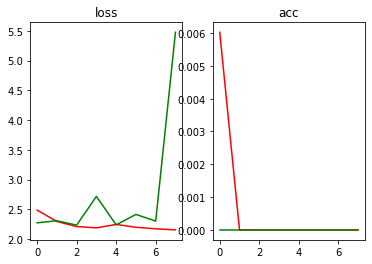

In [ ]:
xplot = list(range(len(train_loss)))

fig = plt.figure()
ax0 = fig.add_subplot(121, title="loss")
ax1 = fig.add_subplot(122, title="acc")

ax0.plot(xplot, train_loss, 'r', label='train')
ax0.plot(xplot, val_loss, 'g', label='val')
ax1.plot(xplot, train_acc, 'r', label='train')
ax1.plot(xplot, val_acc, 'g', label='val')

In [ ]:
def inference(model,test_loader):
  running_acc = 0
  model.eval()
  preds = []
  ogs = []
  with torch.no_grad():
    for (i,batch) in enumerate(test_loader,0):
        x,y = batch
        x = x.to(device)
        y = y.to(device)
        #print(y)
        output = model(x)
        for j in range(len(y)):
          preds.append((torch.argmax(output[j])).item())
          ogs.append(y[j])
  return preds,ogs

In [ ]:
a,b = inference(model,test_data_loader)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
print(len(a))
print(len(b))

In [ ]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
b = [x.item() for x in b]

In [ ]:
accuracy_score(b,a)

0.07707129094412331

In [ ]:
f1_score(b,a, average='macro')

0.019870430853205674

In [ ]:
recall_score(b,a,average = 'macro')

0.07038239538239538

In [ ]:
import os
import matplotlib.pyplot as plt

In [ ]:
def visualise_classes(path):
  class_size = []
  for file in os.listdir(path):
    file_count = len(os.listdir(path+'/'+file))
    class_size.append(file_count)
  plt.plot(class_size)
  plt.show()
  return class_size

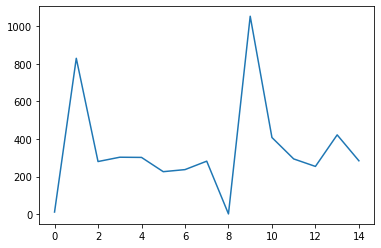

In [ ]:
weights = visualise_classes("/content/drive/MyDrive/kyw/updated_dataset")

In [ ]:
weights = [1/x for x in weights]

TypeError: ignored

In [ ]:
weights

[11, 830, 280, 303, 302, 226, 237, 282, 1, 1054, 408, 294, 254, 422, 284]

In [ ]:
resampled_weights = [1/x for x in weights]

In [ ]:
resampled_weights

[0.09090909090909091,
 0.0012048192771084338,
 0.0035714285714285713,
 0.0033003300330033004,
 0.0033112582781456954,
 0.004424778761061947,
 0.004219409282700422,
 0.0035460992907801418,
 1.0,
 0.0009487666034155598,
 0.0024509803921568627,
 0.003401360544217687,
 0.003937007874015748,
 0.002369668246445498,
 0.0035211267605633804]

In [ ]:
resampled_weights = torch.Tens